## Accessing the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
emotions_df = pd.read_csv('./dataset/training.csv')
emotions_df.head()
emotions_df.columns

Index(['text', 'label'], dtype='object')

In [23]:
# a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4).

emotions_with_labels = emotions_df.copy()
emotions_with_labels['label'] = emotions_with_labels['label'].replace({0:'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5:'surprise'})


<Axes: xlabel='label'>

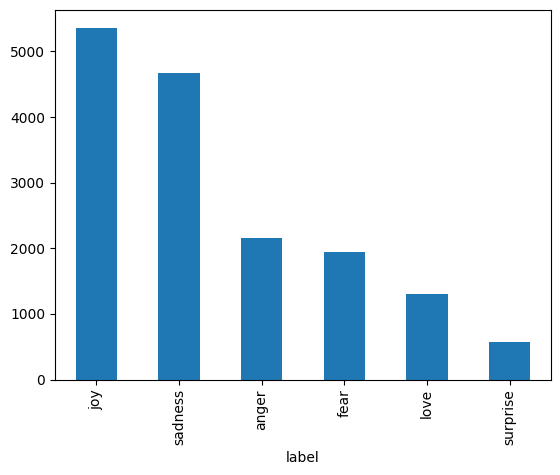

In [25]:
# this tells me that the dataset is kinda balanced and it'll be good for distinguishing joy and sadness

emotions_with_labels.value_counts('label')
emotions_with_labels['label'].value_counts().plot(kind='bar')

In [31]:
emotions_with_labels[emotions_with_labels['label'] == 'love'].head()
emotions_with_labels.isna().sum()
# emotions_with_labels.iloc[14].text

text     0
label    0
dtype: int64

## Preprocessing

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)         # remove punctuation
    text = re.sub(r'\d+', '', text)             # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()    # remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # remove stopwords
    return text

In [34]:
emotions_with_labels['text'] = emotions_with_labels['text'].apply(preprocess)

In [35]:
emotions_with_labels['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

## Wordcloud

In [36]:
from wordcloud import WordCloud

def plot_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(text) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

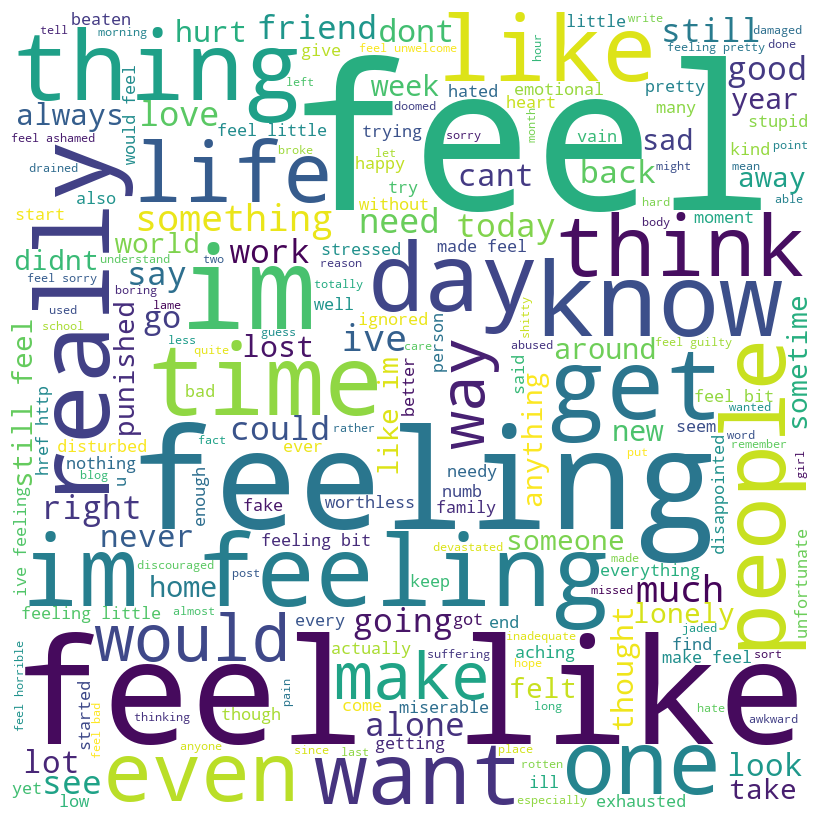

In [38]:
plot_wordcloud(' '.join(emotions_with_labels[emotions_with_labels['label'] == 'sadness']['text']))

## Tokenization

In [ ]:
emotions_with_labels['text'] = emotions_with_labels['text'].apply(word_tokenize)

TypeError: expected string or bytes-like object, got 'list'

,text,label
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, aroun...",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, st...",love
4,"[feeling, grouchy]",anger
...,...,...
15995,"[brief, time, beanbag, said, anna, feel, like,...",sadness
15996,"[turning, feel, pathetic, still, waiting, tabl...",sadness
15997,"[feel, strong, good, overall]",joy
15998,"[feel, like, rude, comment, im, glad]",anger


## Making the Model/RNN

In [ ]:
import 